Epsilon-Greedy Q-values: [-0.58122789 -1.11231275 -0.16554489  1.00996098 -0.42539816 -0.90950172
 -1.85012299  0.92891575 -0.32378028  1.38917147]
Total reward (Epsilon-Greedy): 595.47
Softmax Q-values: [ 0.20521732 -1.84226759  0.06058209  0.62996091 -0.23183756 -0.31833659
 -1.36543951  0.67701423 -1.96126259  1.40425482]
Total reward (Softmax): 437.61


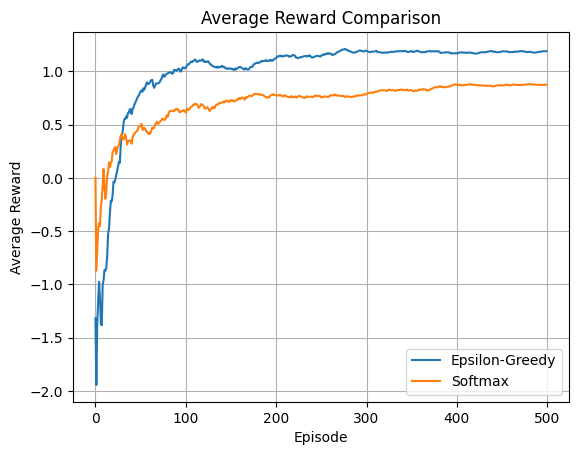

In [1]:
#RL Lab Experiment 4 - Epsilon Greedy and Softmax Policy (E0123047)
import numpy as np
import matplotlib.pyplot as plt
class MultiArmedBanditEnv:
    def __init__(self, n_arms=10):
        self.n_arms = n_arms
        self.true = np.random.normal(0, 1, n_arms)
        self.best_action = np.argmax(self.true)
        self.reset()
    def reset(self):
        return None
    def step(self, action):
        reward = np.random.normal(self.true[action], 1)
        return None, reward, False, False, {}
 def run_epsilon_greedy(env, episodes=500, epsilon=0.1):
    k = env.n_arms
    Q = np.zeros(k)
    N = np.zeros(k)
    rewards = []
    for _ in range(episodes):
        env.reset()
        action = np.random.choice(k) if np.random.rand() < epsilon else np.argmax(Q)
        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        rewards.append(reward)
    return Q, rewards
 def run_softmax(env, episodes=500, temperature=0.5):
    k = env.n_arms
    Q = np.zeros(k)
    N = np.zeros(k)
    rewards = []
    for _ in range(episodes):
        env.reset()
        exp_Q = np.exp((Q - np.max(Q)) / temperature)
        probabilities = exp_Q / np.sum(exp_Q)
        action = np.random.choice(k, p=probabilities)
        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        rewards.append(reward)
    return Q, rewards
 env = MultiArmedBanditEnv(n_arms=10)
 Q_eps, rewards_eps = run_epsilon_greedy(env, episodes=500, epsilon=0.1)
 Q_soft, rewards_soft = run_softmax(env, episodes=500, temperature=0.5)
 print("Epsilon-Greedy Q-values:", Q_eps)
 print("Total reward (Epsilon-Greedy):", round(sum(rewards_eps), 2))
 print("Softmax Q-values:", Q_soft)
 print("Total reward (Softmax):", round(sum(rewards_soft), 2))
 avg_reward_eps = np.cumsum(rewards_eps) / (np.arange(len(rewards_eps)) + 1)
 avg_reward_soft = np.cumsum(rewards_soft) / (np.arange(len(rewards_soft)) + 1)
 plt.plot(avg_reward_eps, label='Epsilon-Greedy')
 plt.plot(avg_reward_soft, label='Softmax')
 plt.xlabel('Episode')
 plt.ylabel('Average Reward')
 plt.title('Average Reward Comparison')
 plt.legend()
 plt.grid(True)
 plt.show()